# Part 3: Linear Regression - Your First Model 📉

In this notebook, we'll build the simplest possible machine learning model: **Linear Regression**.

**Goal**: Fit a line ($y = wx + b$) to some noisy data.

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Create Synthetic Data

Let's make some fake data where $y = 2x + 1$ plus some noise.

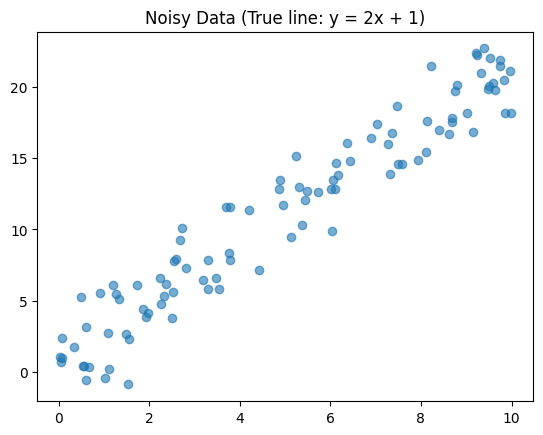

In [6]:
# Data Generation
X = torch.rand(100, 1) * 10  # 100 random points between 0 and 10
y = 2 * X + 1 + torch.randn(100, 1) * 2  # Add some noise

# Visualize it
plt.scatter(X.numpy(), y .numpy(), alpha=0.6)
plt.title("Noisy Data (True line: y = 2x + 1)")
plt.show()

## 2. The PyTorch Model

We could define weights manually, but PyTorch makes it easy with `nn.Linear`.

`nn.Linear(in_features, out_features)` computes $y = xA^T + b$.

In [ ]:
model = nn.Linear(1, 1)  # 1 input (x), 1 output (y)

print(f"Initial Weight: {model.weight.item():.2f}")
print(f"Initial Bias: {model.bias.item():.2f}")

## 3. Loss and Optimizer

We need two things to train:
1. **Loss Function**: Measures how bad the model is (MSE: Mean Squared Error).
2. **Optimizer**: Adjusts the weights (SGD: Stochastic Gradient Descent).

In [ ]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

## 4. The Training Loop

This is the standard loop you will see everywhere:
1. **Forward**: Guess predictions.
2. **Loss**: Check error.
3. **Zero Grad**: Clear past gradients.
4. **Backward**: Compute new gradients.
5. **Step**: Update weights.

In [ ]:
epochs = 100

for epoch in range(epochs):
    # 1. Forward pass
    predictions = model(X)
    
    # 2. Compute loss
    loss = criterion(predictions, y)
    
    # 3. Training step
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}: Loss = {loss.item():.4f}")

## 5. Check Results

In [ ]:
w_final = model.weight.item()
b_final = model.bias.item()

print(f"\nTrue Function: y = 2x + 1")
print(f"Learned Function: y = {w_final:.2f}x + {b_final:.2f}")

# Plot
predicted = model(X).detach().numpy()
plt.scatter(X.numpy(), y.numpy(), alpha=0.6, label='Data')
plt.plot(X.numpy(), predicted, 'r', label='Fitted Line')
plt.legend()
plt.show()

## 🧠 Summary

1. **`nn.Linear`** creates a linear layer.
2. **`nn.MSELoss`** creates a loss function.
3. **`optim.SGD`** creates an optimizer.
4. We loop through **Forward -> Loss -> Backward -> Step**.

Next up: **Neural Networks** - Solving non-linear problems!